256


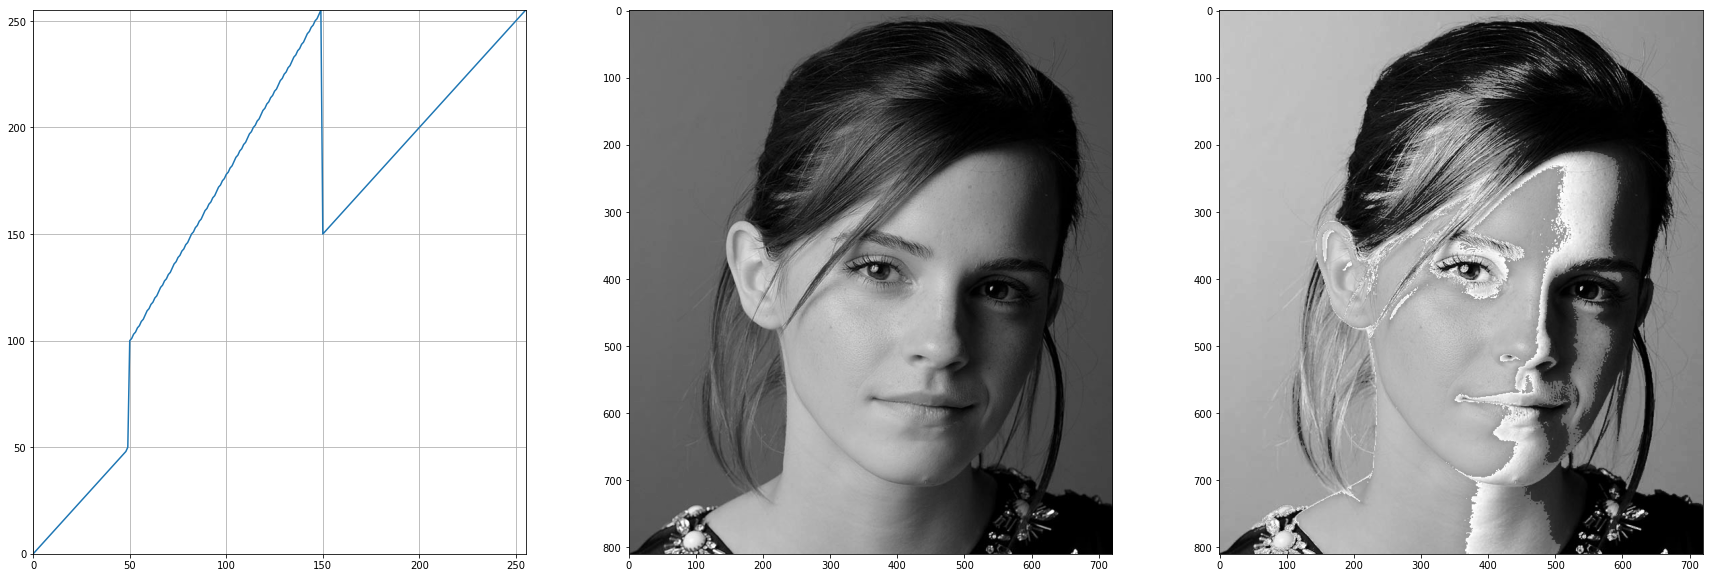

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('emma_gray.jpg', cv.IMREAD_GRAYSCALE)
assert image is not None

t1 = np.linspace(0, 50, 50)
t2 = np.linspace(100, 255, 100)
t3 = np.linspace(150, 255, 106)
t = np.concatenate((t1, t2, t3), axis=0).astype(np.uint8)
print(len(t))
filtered_image = cv.LUT(image, t)

fig, ax = plt.subplots(1, 3, figsize = (30, 10))
ax[0].plot(t)
ax[0].grid(True)
ax[0].set_xlim(0, 255)
ax[0].set_ylim(0, 255)
ax[1].imshow(image, cmap = 'gray', vmin=0, vmax=255)
ax[2].imshow(filtered_image, cmap = 'gray', vmin=0, vmax=255)
plt.show()

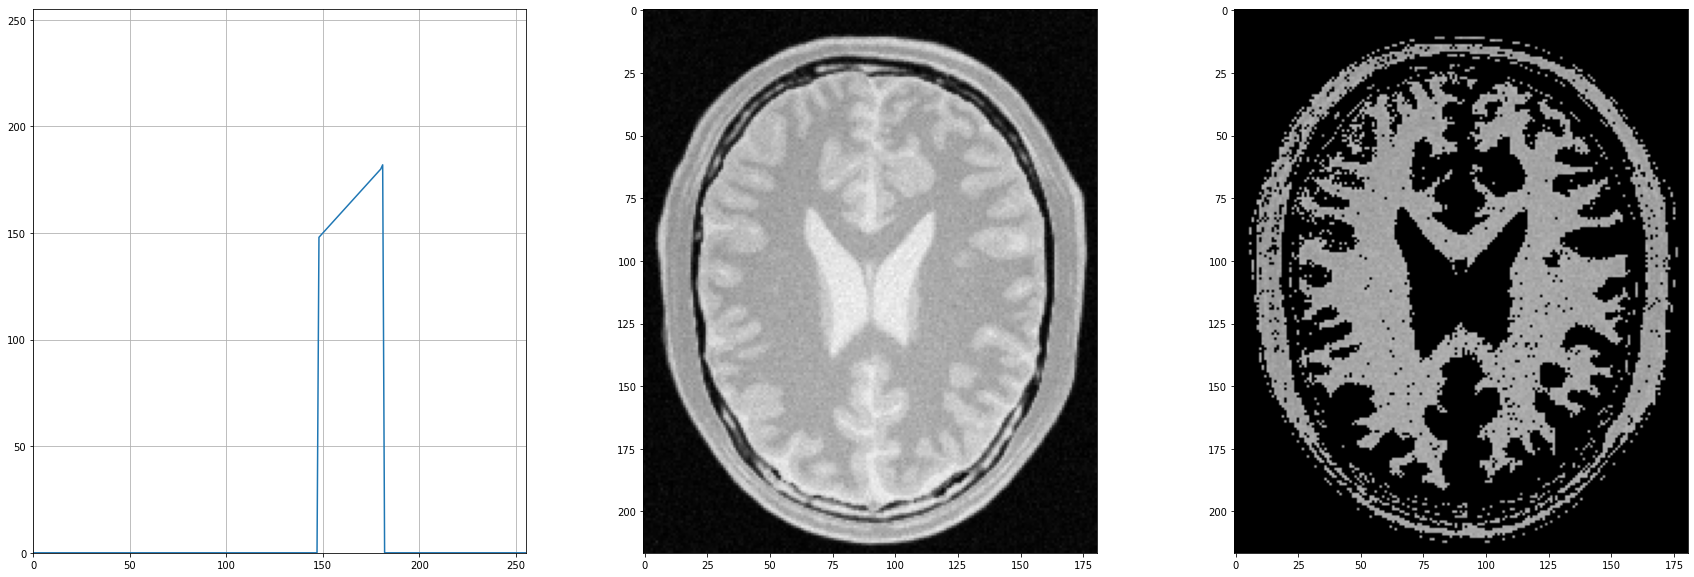

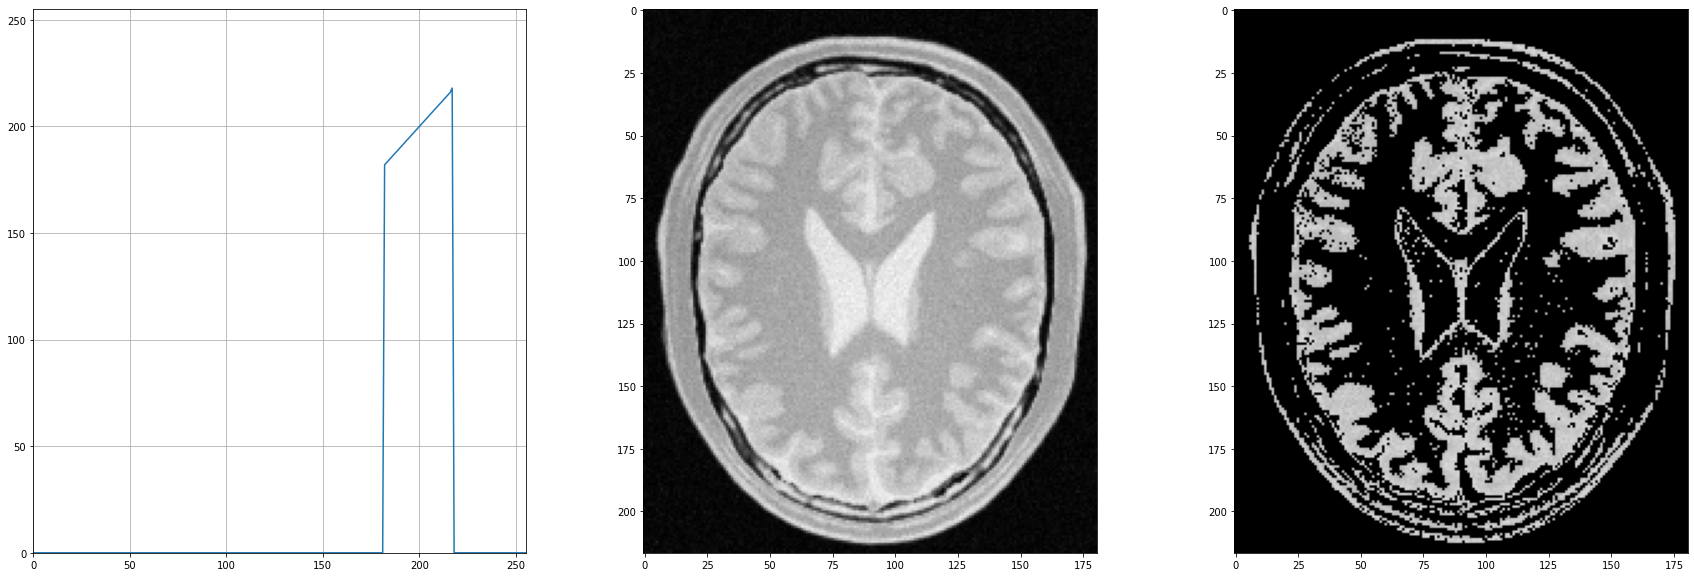

In [16]:
#Question 02
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert image is not None
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

white_begin = 148
white_end = 182
t1 = np.linspace(0, 0, white_begin)
t2 = np.linspace(white_begin, white_end, white_end - white_begin)
t3 = np.linspace(0, 0, 256 - white_end)
t = np.concatenate((t1, t2, t3), axis=0).astype(np.uint8)
filtered_image = cv.LUT(image, t)

fig, ax = plt.subplots(1, 3, figsize = (30, 10))
ax[0].plot(t)
ax[0].grid(True)
ax[0].set_xlim(0, 255)
ax[0].set_ylim(0, 255)
ax[1].imshow(image, cmap = 'gray', vmin=0, vmax=255)
ax[2].imshow(filtered_image, cmap = 'gray', vmin=0, vmax=255)

gray_begin = 182
gray_end = 218
t1 = np.linspace(0, 0, gray_begin)
t2 = np.linspace(gray_begin, gray_end, gray_end - gray_begin)
t3 = np.linspace(0, 0, 256 - gray_end)
t = np.concatenate((t1, t2, t3), axis=0).astype(np.uint8)
filtered_image = cv.LUT(image, t)

fig, ax = plt.subplots(1, 3, figsize = (30, 10))
ax[0].plot(t)
ax[0].grid(True)
ax[0].set_xlim(0, 255)
ax[0].set_ylim(0, 255)
ax[1].imshow(image, cmap = 'gray', vmin=0, vmax=255)
ax[2].imshow(filtered_image, cmap = 'gray', vmin=0, vmax=255)

plt.show()

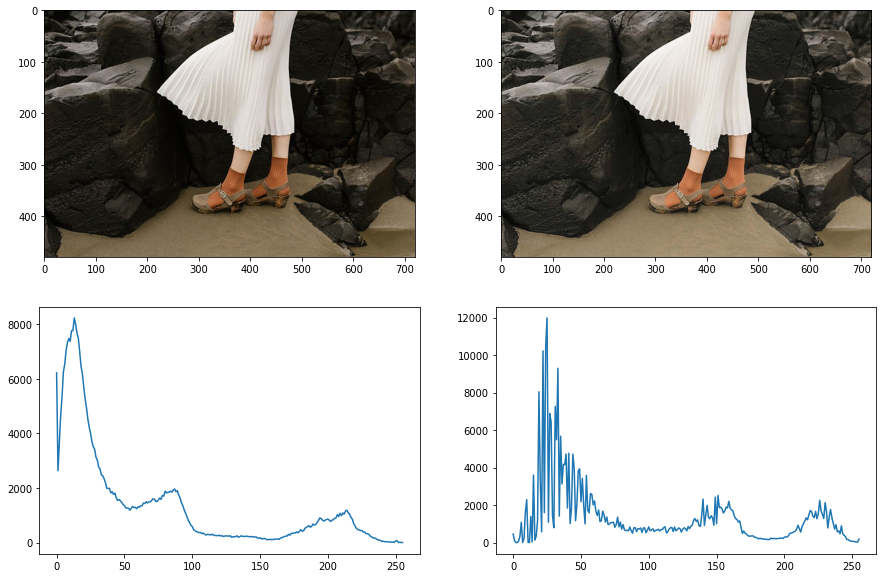

In [48]:
# Question 03
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('highlights_and_shadows.jpg')
assert image is not None
Lab_image = cv.cvtColor(image, cv.COLOR_BGR2Lab)
img = np.array(Lab_image)
hist_img = cv.calcHist([image], [0], None, [256], [0, 256])
L,a,b = cv.split(img)
ga = 0.75
t = np.array([(p/255)**ga*255 for p in range(0, 256)]).astype(np.uint8)
L = cv.LUT(L, t)
modified_image = cv.merge([L, a, b])
new_image = cv.cvtColor(modified_image, cv.COLOR_Lab2RGB)
hist_new_image = cv.calcHist([new_image], [0], None, [256], [0, 256])
image = cv.cvtColor(image,cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(2, 2, figsize = (15, 10))
ax[0][0].imshow(image)
ax[0][1].imshow(new_image)
ax[1][0].plot(hist_img)
ax[1][1].plot(hist_new_image)
plt.show()

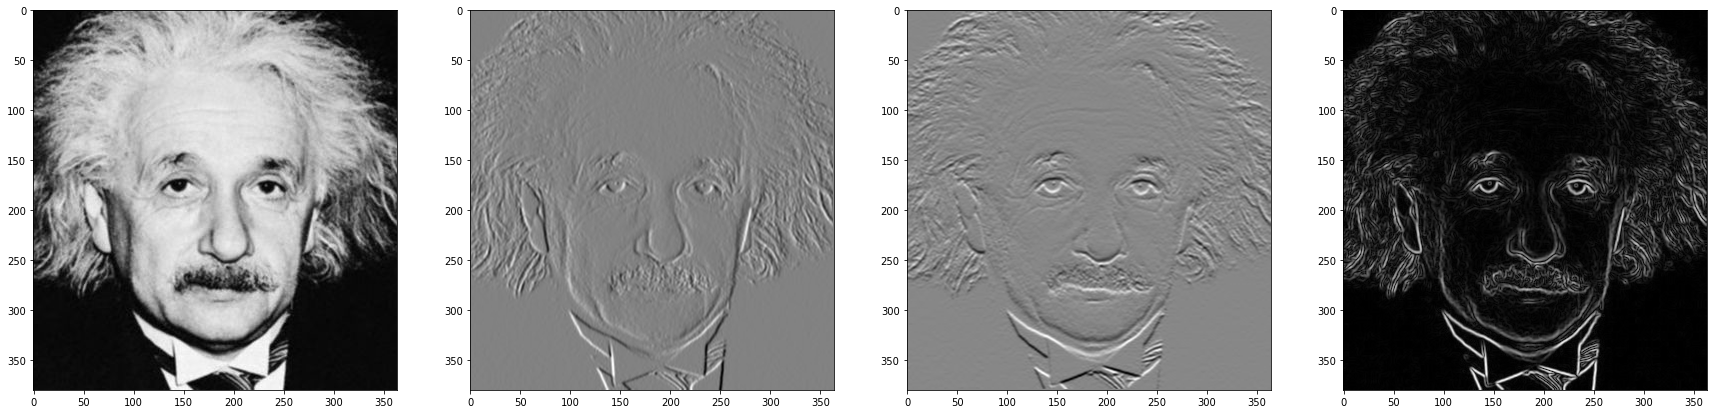

In [20]:
# Question 06
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)

sobel_h_kernal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype='float')
sobel_h_img = cv.filter2D(image, -1, sobel_h_kernal)
sobel_v_kernal = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]] , dtype = 'float')
sobel_v_img = cv.filter2D(image, -1, sobel_v_kernal)

gradient_img = (sobel_v_img**2 + sobel_h_img**2)**0.5

fig, ax = plt.subplots(1, 4, figsize = (30, 10))
ax[0].imshow(image, cmap = 'gray')
ax[1].imshow(sobel_h_img, cmap = 'gray')
ax[2].imshow(sobel_v_img, cmap = 'gray')
ax[3].imshow(gradient_img, cmap = 'gray')
plt.show()